## Import the required libraries first and load data file TwitterHate.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
tweeter_data = pd.read_csv ("TwitterHate.csv")

In [3]:
# tweeter_data parameters 
tweeter_data.shape, tweeter_data.size, tweeter_data.columns, tweeter_data.ndim

((31962, 3), 95886, Index(['id', 'label', 'tweet'], dtype='object'), 2)

In [4]:
# description of data set 
tweeter_data.describe(), #tweeter_data.info

(                 id         label
 count  31962.000000  31962.000000
 mean   15981.500000      0.070146
 std     9226.778988      0.255397
 min        1.000000      0.000000
 25%     7991.250000      0.000000
 50%    15981.500000      0.000000
 75%    23971.750000      0.000000
 max    31962.000000      1.000000,)

In [5]:
tweeter_list1 = [tweet for tweet in tweeter_data ["label"]]
print (len(tweeter_list1))
len([i for i in tweeter_list1 if i ==1])


31962


2242

In [16]:
tweeter_hate = tweeter_data[tweeter_data["label"] ==1]
tweeter_hate["tweet"][:4]

13    @user #cnn calls #michigan middle school 'buil...
14    no comment!  in #australia   #opkillingbay #se...
17                               retweet if you agree! 
23      @user @user lumpy says i am a . prove it lumpy.
Name: tweet, dtype: object

##  Get the tweets into a list for easy text cleanup and manipulation

In [17]:
tweeter_list = [tweet for tweet in tweeter_data ["tweet"]]
print (len(tweeter_list))
tweeter_list[:3]

31962


[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty']

##  Text cleanup: 

### Normalize the casing.

In [18]:
tweeter_list = [tweet.lower() for tweet in tweeter_list]

In [19]:
tweeter_list[:5]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

###  Using regular expressions, remove user handles. These begin with '@’.

In [24]:
import re
tweeter_list_1 = []
for item in tweeter_list:
    tweeter_list_1.append(re.sub (r"@\S+" , '', item))   # also can use  r"@\w+"    
tweeter_list_1[:5]

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

### Using regular expressions, remove URLs.

In [25]:
import re
tweeter_list_2 = []
for tweet in tweeter_list_1:
    re.sub(r"http\S+", "", tweet)
    re.sub(r"www.\S+", "", tweet)
    tweeter_list_2.append(tweet)
tweeter_list_2[:5]

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

### Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

In [26]:
from nltk import sent_tokenize , word_tokenize
tweeter_list_3 = []
for tweet in tweeter_list_2:
    tweeter_list_3.append(word_tokenize(tweet))
    
tweeter_list_3 [0]

['when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 '.',
 '#',
 'run']

### Remove stop words.

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
tweeter_list_4 = []
for tweet in tweeter_list_3:
    tweeter_list_4.append([word for word in tweet if word.lower() not in stop_words])


tweeter_list_4[2]

['bihday', 'majesty']

### Remove redundant terms like ‘amp’, ‘rt’, etc.

In [28]:
tweeter_list_4[2]

['bihday', 'majesty']


### Remove ‘#’ symbols from the tweet while retaining the term

In [29]:
tweeter_list_5 =[]
for tweet in tweeter_list_4:
    tweeter_list_5.append([word for word in tweet if word.isalpha() and word not in stop_words])

tweeter_list_5 [2]

['bihday', 'majesty']

## Extra cleanup by removing terms with a length of 1.

In [30]:
tweeter_list_6 =[]
for tweet in tweeter_list_5:
    tweeter_list_6.append([word for word in tweet if len(word)>1])

tweeter_list_6[2]

['bihday', 'majesty']

## Check out the top terms in the tweets:

### First, get all the tokenized terms into one large list

In [31]:
tweeter_terms = []
for tweet in tweeter_list_6:
    for word in tweet:
        tweeter_terms.append(word)
        
len(tweeter_terms)

233164

### Use the counter and find the 10 most common terms.

In [32]:
import spacy
from collections import Counter
word_count = Counter(tweeter_terms)
common_words_10 = word_count.most_common(10)
common_words_10

[('love', 2735),
 ('day', 2237),
 ('amp', 1776),
 ('happy', 1645),
 ('time', 1120),
 ('life', 1116),
 ('today', 1062),
 ('like', 1044),
 ('new', 984),
 ('thankful', 946)]

In [33]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

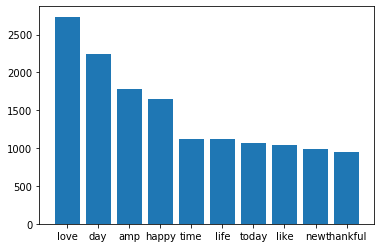

In [55]:
X,Y= [],[]
[X.append(pair[0]) for pair in common_words_10]
[Y.append(pair[1]) for pair in common_words_10]
plt.bar(X,Y)

## Data formatting for predictive modeling:

### Join the tokens back to form strings. This will be required for the vectorizers.

In [67]:
tweeter_list_7 = []
for tweet in tweeter_list_6:
    tweeter_list_7.append(" ".join (tweet))
tweeter_list_7 [:3]

['father dysfunctional selfish drags kids dysfunction run',
 'thanks lyft credit ca use cause offer wheelchair vans pdx disapointed getthanked',
 'bihday majesty']

### Assign x and y.

In [69]:
tweeter_data ["refine_tweet"] = tweeter_list_7
tweeter_data.head(3)

,id,label,tweet,refine_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit ca use cause offer wheelcha...
2,3,0,bihday your majesty,bihday majesty


In [72]:
X = tweeter_data[["refine_tweet"]]
y = tweeter_data["label"]

In [73]:
X.shape , y.shape , X.ndim, y.ndim,  type (X), type(y) 

((31962, 1),
 (31962,),
 2,
 1,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

### Perform train_test_split using sklearn.

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y ,test_size = 0.3, random_state = 123)

X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((22373, 1), (9589, 1), (22373,), (9589,))

## We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

### Import TF-IDF vectorizer from sklearn.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Instantiate with a maximum of 5000 terms in your vocabulary.

In [76]:
tfidf = TfidfVectorizer(max_features=5000,  ngram_range=(1,3))

### Fit and apply on the train set.

### Apply on the test set

In [77]:
X_tfidf = tfidf.fit_transform (tweeter_data['refine_tweet'])     

In [78]:
X_tfidf.toarray().shape

(31962, 5000)

In [79]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_tfidf,y ,test_size = 0.3, random_state = 123)

X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((22373, 5000), (9589, 5000), (22373,), (9589,))

In [81]:
X_train

<22373x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 144605 stored elements in Compressed Sparse Row format>

In [82]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model building: Ordinary Logistic Regression
### Instantiate Logistic Regression from sklearn with default parameters

In [83]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

### Fit into the train data.


In [84]:
lr = LR.fit(X_train, y_train)

In [85]:
lr

LogisticRegression()

### Make predictions for the train and the test set.

In [86]:
y_pred_train = lr.predict (X_train)

In [87]:
y_pred_test = lr.predict(X_test)

In [88]:
y_pred_test, y_pred_train

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

## Model evaluation: Accuracy, recall, and f_1 score.
### Report the accuracy on the train set.


In [89]:
from sklearn import metrics

In [90]:
acc_score = metrics.accuracy_score(y_train, y_pred_train)
acc_score*100

95.41858490144371

In [91]:
acc_score_test = metrics.accuracy_score(y_test, y_pred_test)
acc_score_test*100

94.99426426113254

### Report the recall on the train set: decent, high, or low.

In [92]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
# An F1 score reaches its best value at 1 and worst value at 0. A low F1 score is an indication of both poor precision 
# and poor recall. Best suited for data imbalance problem and practical problme as consider hormonic mean 

# for classification accuracy in better parameter best have 100 % accuracy

# We have got recall of 0.631 which is good for this model as it's above 0.5. F1 score - F1 Score is the weighted 
# average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
# ... Accuracy works best if false positives and false negatives have similar cost

In [93]:
# For test data set 
F1_Score = f1_score(y_test, y_pred_test)
F1_Score

0.4618834080717489

In [94]:
# For train data sent 
F1_Score = f1_score(y_train, y_pred_train)
F1_Score

0.529168580615526

### Get the f1 score on the train set

In [95]:
# for test data set 
recall = recall_score(y_test, y_pred_test)
recall

0.30700447093889716

In [96]:
# for train data set
recall = recall_score(y_train, y_pred_train)
recall

0.3666454487587524

## Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.
### Adjust the appropriate class in the LogisticRegression model.

In [97]:
# oversampling use to address imblance problem
#!pip install imbalanced-learn

In [98]:
# check version number
import imblearn
#print(imblearn.__version__)

In [99]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [100]:
oversample = RandomOverSampler(sampling_strategy='minority')  # 100 percent oversampling of minority data take place
oversample_1 = RandomOverSampler(sampling_strategy=0.5)   # 50 percent oversmapling of minority data take place 

In [101]:
X , y

(                                            refine_tweet
 0      father dysfunctional selfish drags kids dysfun...
 1      thanks lyft credit ca use cause offer wheelcha...
 2                                         bihday majesty
 3                                   model love take time
 4                          factsguide society motivation
 ...                                                  ...
 31957                                      ate isz youuu
 31958  see nina turner airwaves trying wrap mantle ge...
 31959    listening sad songs monday morning otw work sad
 31960    sikh temple vandalised calgary wso condemns act
 31961                                       thank follow
 
 [31962 rows x 1 columns], 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31957    0
 31958    0
 31959    0
 31960    1
 31961    0
 Name: label, Length: 31962, dtype: int64)

In [102]:
# X_tfidf.toarray()

In [103]:
# define dataset 
#X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)\

In [104]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_tfidf, y)

In [105]:
# Train test split for X_over and Y_over 
X_over_train, X_over_test ,y_over_train, y_over_test = train_test_split(X_over, y_over, test_size= 0.3, random_state=123)

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22373, 5000), (9589, 5000), (22373,), (9589,))

In [107]:
X_over_train.shape , y_over_train.shape, X_over_test.shape, y_over_test.shape

((41608, 5000), (41608,), (17832, 5000), (17832,))

In [108]:
X_over_train.shape, y_over_train.shape

((41608, 5000), (41608,))

## Train again with the adjustment and evaluate.
### Train the model on the train set.

In [109]:
lr.fit(X_over_train, y_over_train)

LogisticRegression()

In [110]:
# Predict the outpur for oversmaple train and test and original test set 
y_over_test_pred = lr.predict (X_over_test)
y_over_train_pred = lr.predict (X_over_train)
y_pred_new = lr.predict(X_test)

### Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

In [111]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [112]:
# For test data set 
accuracy_score = accuracy_score (y_over_test, y_over_test_pred)
accuracy_score *100

93.8481381785554

In [113]:
# For test data set 
F1_Score = f1_score(y_over_test, y_over_test_pred)
F1_Score

0.9393621137582224

In [114]:
# For train data sent 
F1_Score = f1_score(y_over_train, y_over_train_pred)
F1_Score

0.9519016191064051

In [115]:
# for test data set 
recall = recall_score(y_test, y_pred_new)
recall

0.9642324888226528

In [116]:
# for train data set
recall = recall_score(y_over_train, y_over_train_pred)
recall

0.9632441262672369

In [117]:
# define undersample strategy
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

In [118]:
# define undersample strategy
undersample_1 = RandomUnderSampler(sampling_strategy=0.5)

In [119]:
X_tfidf.shape, y.shape

((31962, 5000), (31962,))

In [120]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_tfidf, y)

In [121]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
# define dataset 
#X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

In [123]:
# Train test split for X_over and Y_over 
X_under_train, X_under_test ,y_under_train, y_under_test = train_test_split(X_under, y_under, test_size= 0.3, random_state=123)

In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22373, 5000), (9589, 5000), (22373,), (9589,))

In [125]:
X_under_train.shape , y_under_train.shape, X_under_test.shape, y_under_test.shape

((3138, 5000), (3138,), (1346, 5000), (1346,))

In [126]:
X_under_train.toarray().shape, y_under_train.shape

((3138, 5000), (3138,))

In [127]:
lr.fit(X_under_train, y_under_train)

LogisticRegression()

In [128]:
# Predict the outpur for oversmaple train and test and original test set 
y_under_test_pred = lr.predict (X_under_test)
y_under_train_pred = lr.predict (X_under_train)
y_pred_new_under = lr.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [130]:
# For test data set 
accuracy_score = accuracy_score (y_under_test, y_under_test_pred)
accuracy_score *100

84.76968796433879

In [131]:
# For test data set as per previus basic case 
#accuracy_score = accuracy_score(y_test, y_pred_new_under )
#accuracy_score *100

In [132]:
# For test data set 
F1_Score = f1_score(y_under_test, y_under_test_pred)
F1_Score

0.8366533864541833

In [133]:
# For train data sent 
F1_Score = f1_score(y_under_train, y_under_train_pred)
F1_Score

0.9366355741395948

In [134]:
# for test data set 
recall = recall_score(y_test, y_pred_new)
recall

0.9642324888226528

In [135]:
# for train data set
recall = recall_score(y_under_train, y_under_train_pred)
recall

0.9238578680203046

## Regularization and Hyperparameter tuning:
### Import GridSearch and StratifiedKFold because of class imbalance.


 sklearn/ cross_val_score method try various combination of train/ test split, and give output of each spliat as split test score 
 
skearn/ cross_validate method same as above but retrun a dictionary having fit time , score time and test score for each split

Split stratigies:  K fold, Stratified K fold, Shuffle Split, Stratified Shuffle split . K fold  cross_validation is most common.

We generally use Stratified K Fold for classification and K fold for regression type problem 


Hyperparameter tunning: Complex Model have more then hyperparameter with some default values it lead to overfit or underfit

data,we can optimize it by doing grid search for hyperparameters. Grid search try all combinations of value given for a 

hyperparameter and record model performence for these valuse in evaluatoin matrix and keep track of best fit model and 

hyperparameter.We can try all paramerters by writing loop inside loop for each hyperparameter values.
    

In [136]:
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

In [137]:
print ("Classifiing without any cross validation: " ,cross_val_score(LogisticRegression(), X_tfidf, y, cv=5))
print ("Classifiing with KFold cross validation: " ,cross_val_score(LogisticRegression(), X_tfidf, y, cv=KFold(n_splits=5)))
print ("Classifiing with KFold cross validation: " ,cross_val_score(LogisticRegression(), X_tfidf, y, cv=StratifiedKFold(n_splits=5)))

Classifiing without any cross validation:  [0.95150946 0.95150946 0.95244055 0.95071965 0.94931164]
Classifiing with KFold cross validation:  [0.95150946 0.95213515 0.95494368 0.94618273 0.94993742]
Classifiing with KFold cross validation:  [0.95150946 0.95150946 0.95244055 0.95071965 0.94931164]


In [138]:
print ("Classifiing without any cross validation: " ,cross_validate(LogisticRegression(), X_tfidf, y, cv=5))
print ("Classifiing with KFold cross validation: " ,cross_validate(LogisticRegression(), X_tfidf, y, cv=KFold(n_splits=5)))
print ("Classifiing with KFold cross validation: " ,cross_validate(LogisticRegression(), X_tfidf, y, cv=StratifiedKFold(n_splits=5)))

Classifiing without any cross validation:  {'fit_time': array([0.26801538, 0.25701475, 0.23901391, 0.21401215, 0.25301456]), 'score_time': array([0.00100017, 0.00099993, 0.00099993, 0.00099993, 0.00099993]), 'test_score': array([0.95150946, 0.95150946, 0.95244055, 0.95071965, 0.94931164])}
Classifiing with KFold cross validation:  {'fit_time': array([0.24601388, 0.2430141 , 0.18401051, 0.1960113 , 0.22701311]), 'score_time': array([0.00099993, 0.00200009, 0.00100017, 0.00300002, 0.00200009]), 'test_score': array([0.95150946, 0.95213515, 0.95494368, 0.94618273, 0.94993742])}
Classifiing with KFold cross validation:  {'fit_time': array([0.27101564, 0.25201416, 0.24201393, 0.22101235, 0.29901743]), 'score_time': array([0.00200009, 0.0010004 , 0.00099993, 0.00100017, 0.00099993]), 'test_score': array([0.95150946, 0.95150946, 0.95244055, 0.95071965, 0.94931164])}


### Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

### Use a balanced class weight while instantiating the logistic regression.

In [139]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [140]:
for penalty in ['l1', 'l2']:
    for C in [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4,1.6]:
        print (penalty,"........", C)

l1 ........ 0.2
l1 ........ 0.4
l1 ........ 0.6
l1 ........ 0.8
l1 ........ 1.0
l1 ........ 1.2
l1 ........ 1.4
l1 ........ 1.6
l2 ........ 0.2
l2 ........ 0.4
l2 ........ 0.6
l2 ........ 0.8
l2 ........ 1.0
l2 ........ 1.2
l2 ........ 1.4
l2 ........ 1.6


In [141]:
#X_train, X_test, y_train, y_test = train_test_split (X_tfidf,y ,test_size = 0.3, random_state = 123)

In [142]:
X_train, X_test, y_train, y_test = train_test_split (X_over,y_over ,test_size = 0.3, random_state = 123)

In [143]:
#X_train, X_test, y_train, y_test = train_test_split (X_under,y_undern ,test_size = 0.3, random_state = 123)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
lr = LogisticRegression()
lr

LogisticRegression()

## Find the parameters with the best recall in cross validation.
### Choose ‘recall’ as the metric for scoring.


In [146]:
score = recall 

### Choose stratified 4 fold cross validation scheme.


In [147]:
stratified = StratifiedKFold (n_splits=4)

### Fit into the train set.

In [148]:
best_score = 0.0
best_parameters = {'penalty' :'l2','C' : 1.5}

for penalty in ['l1', 'l2']:
    for C in [ 0.8, 1.0, 1.2, 1.4,1.6, 1.8, 2.0, 2.2,3.0,3.5,4.5,4.6,4.7,5.5, 10.5]:
        score = cross_val_score (LogisticRegression(penalty= penalty, C= C), X_train, y_train,  cv=StratifiedKFold(n_splits=5), n_jobs=-1).mean()
        if score > best_score:
            best_score = score
            best_parameters['penalty'], best_parameters ['C'] = penalty, C
        print ("penalty:    ", penalty , " C :   " , C)
print ("Best Score:", best_score, " best_parameters: ", best_parameters)

penalty:     l1  C :    0.8
penalty:     l1  C :    1.0
penalty:     l1  C :    1.2
penalty:     l1  C :    1.4
penalty:     l1  C :    1.6
penalty:     l1  C :    1.8
penalty:     l1  C :    2.0
penalty:     l1  C :    2.2
penalty:     l1  C :    3.0
penalty:     l1  C :    3.5
penalty:     l1  C :    4.5
penalty:     l1  C :    4.6
penalty:     l1  C :    4.7
penalty:     l1  C :    5.5
penalty:     l1  C :    10.5
penalty:     l2  C :    0.8
penalty:     l2  C :    1.0
penalty:     l2  C :    1.2
penalty:     l2  C :    1.4
penalty:     l2  C :    1.6
penalty:     l2  C :    1.8
penalty:     l2  C :    2.0
penalty:     l2  C :    2.2
penalty:     l2  C :    3.0
penalty:     l2  C :    3.5
penalty:     l2  C :    4.5
penalty:     l2  C :    4.6
penalty:     l2  C :    4.7
penalty:     l2  C :    5.5
penalty:     l2  C :    10.5
Best Score: 0.9528215905177732  best_parameters:  {'penalty': 'l2', 'C': 10.5}


## What are the best parameters?

In [149]:
print ("Best Score:", best_score, " best_parameters: ", best_parameters)

Best Score: 0.9528215905177732  best_parameters:  {'penalty': 'l2', 'C': 10.5}


## Predict and evaluate using the best estimator.
### Use the best estimator from the grid search to make predictions on the test set.

In [150]:
lr_best = LogisticRegression (** best_parameters)
lr_best.fit(X_train, y_train)

print ("Best  Score:", lr_best.score(X_test, y_test))

Best  Score: 0.9538470165993719


C:\Users\10559\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [151]:
y_test_pred_best = lr_best.predict(X_test)

### What is the recall on the test set for the toxic comments?


In [152]:
recall_score_best = recall_score (y_test, y_test_pred_best)

In [153]:
recall_score_best

0.9812507016952958

### What is the f_1 score?

In [154]:
f_1_scpre_best = f1_score (y_test, y_test_pred_best)

In [155]:
f_1_scpre_best

0.9550346937660493

#                                                 THE END 